# BrainStation DataScience Course Project

## Jorge Garciadiego

The Objective of this project is to develop a ML based model for the prediction The likehood of a customer to suscribe to a new banking priduct <font color=salmon>(Term Deopsit)</font>

The dataset provided contains records of marketing campaings for similar products. Some clients had been contacted more than once in order to know if the product would be subscribed or not &#x27A9; this is `important`, since there would be more than one record for the same person.

DataSet name: `full.csv` <br>
location: `data/`

## <font color=#52b2cf>Summary</font>

<font size= 3px color=#ffee93>&#x27AD;</font> It seems that people with lower education levels tend to subscribe more in proportion to the total of people of the same group that participated in the campaign.

<font size= 3px color=#ffee93>&#x27AD;</font> Altouhg this groups don't have the highest rate of participation in the campaing they have the highest positive answer rates.

<font size= 3px color=#ffee93>&#x27AD;</font> We can observe that people with a lower degree of education and that their work activities are of low complexity, they are retired, they are students or it is not known, they tend to say yes more easily than other groups.

&emsp; <font size= 3px color=#f68c70>&#x27AD;</font> Refer to <font color=#f68c70>1.1 Job Education Subscribed Distribution</font>

<font size= 3px color=#ffee93>&#x27AD;</font> People with either `loan` or `housing` tends to subscribe more than those who dont have any kind of credit.

&emsp; <font size= 3px color=#f68c70>&#x27AD;</font> Refer to <font color=#f68c70>1.2 Loan and/or Housing</font>

<font size= 3px color=#ffee93>&#x27AD;</font> Data shows that from previous campaigns in general there were more successful outcomes when less contacts where performed. However this could be because the campaigns are focus on people that haven't been contacted before.

&emsp; <font size= 3px color=#f68c70>&#x27AD;</font> Refer to <font color=#f68c70>1.3 Outcome Proportions</font>

<font size= 3px color=#ffee93>&#x27AD;</font> Loocking the `age` variable by it self seems that the there are some extreme left and right values, however taking those values out does not have an impact on the metrics, occurrencies with an `age` greater than `69` are just `1%` of the dataset and they could have meaningful data on the other columns.

<font size= 3px color=#ffee93>&#x27AD;</font> Observations with age greater or equal to 70 years old represent only 1.15% of the records

<font size= 3px color=#ffee93>&#x27AD;</font> The age average goes from `40.02` to `39.59` if we take out the observations with an `age >= 70` and the median stays at `38`. Therefore we are preserving those observations.

&emsp; <font size= 3px color=#f68c70>&#x27AD;</font> Refer to <font color=#f68c70>1.4 Age Distribution</font>

the `Default` column has three types of values <font color=#9cadce>[yes, no, unknown]</font> but the hole dataset has only three occurrences of <font color=#9cadce>'yes'</font> this could mean there was an error at capturing the data or that in the first place people with default credit were no subject of these campaigns or that maybe these 3 observations occured before the current campaign, however, the precesence of <font color=#9cadce>8597 'unknown'</font> values could mean tha that information was not available at the time or not collected.

<font color=#61f4de>&#x27AD;</font> At this point it could be more meaningful use the <font color=#9cadce>unknown</font> values as a category value than the 3 obserbations with <font color=#9cadce>yes</font>

&emsp; <font size= 3px color=#f68c70>&#x27AD;</font> Refer to <font color=#f68c70>1.5 Unknown Values</font>

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
raw_data = pd.read_csv('data/full.csv')

/Users/iorch/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN


In [6]:
raw_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,NaN,NaN
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN,NaN
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN,NaN
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,NaN,NaN
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no,NaN,NaN


### <font color=#adf7b6>Input Variables</font>

<font size= 3px color=#ffee93>&#x27AB;</font> Input Variables <font size= 3px color=#ffee93>&#x27AD;</font> Bank Client data <br>

<font color=#ffee93>&#x27AD;These columns describe the Client attributes</font><br>

<font size= 3px color=#ffee93>1 &#x27AD;</font> age <font color=#adf7b6>(numeric)</font><br>
<font size= 3px color=#ffee93>2 &#x27AD;</font> job : type of job (<font color=#adf7b6>categorical</font>`: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'`)<br>
<font size= 3px color=#ffee93>3 &#x27AD;</font> marital : marital status (<font color=#adf7b6>categorical</font>`: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed`)<br>
<font size= 3px color=#ffee93>4 &#x27AD;</font> education (<font color=#adf7b6>categorical</font>`: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'`)<br>
<font size= 3px color=#ffee93>5 &#x27AD;</font> default: has credit in default? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>6 &#x27AD;</font> housing: has housing loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>
<font size= 3px color=#ffee93>7 &#x27AD;</font> loan: has personal loan? (<font color=#adf7b6>categorical</font>`: 'no','yes','unknown'`)<br>

In [7]:
client_data = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

In [8]:
raw_data.loc[:, client_data].head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [9]:
raw_data.loc[:, client_data].describe(include=[object, np.number])

,age,job,marital,education,default,housing,loan
count,41188.00000,41188,41188,41188,41188,41188,41188
unique,NaN,12,4,8,3,3,3
top,NaN,admin.,married,university.degree,no,yes,no
freq,NaN,10422,24928,12168,32588,21576,33950
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN


### <font color=#adf7b6> Variables related with the last contact of the current campaign </font>

<font size= 3px color=#ffee93>8 &#x27AD;</font>- contact: contact communication type (<font color=#adf7b6>categorical</font>: `'cellular','telephone'`)<br>
<font size= 3px color=#ffee93>9 &#x27AD;</font>- month: last contact month of year (<font color=#adf7b6>categorical</font>: `'jan', 'feb', 'mar', ..., 'nov', 'dec'`)<br>
<font size= 3px color=#ffee93>10 &#x27AD;</font>- day_of_week: last contact day of the week (<font color=#adf7b6>categorical</font>: `'mon','tue','wed','thu','fri'`)<br>
<font size= 3px color=#ffee93>11 &#x27AD;</font>- duration: last contact duration, in seconds (<font color=#adf7b6>numeric</font>). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [10]:
last_contact = ['contact', 'month', 'day_of_week', 'duration']

In [11]:
raw_data.loc[:, last_contact].describe(include=[object, np.number])

,contact,month,day_of_week,duration
count,41188,41188,41188,41188.000000
unique,2,10,5,NaN
top,cellular,may,thu,NaN
freq,26144,13769,8623,NaN
mean,NaN,NaN,NaN,258.285010
std,NaN,NaN,NaN,259.279249
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,102.000000
50%,NaN,NaN,NaN,180.000000
75%,NaN,NaN,NaN,319.000000


### <font color=#adf7b6> Other Attributes </font>
<font size= 3px color=#ffee93>12 &#x27AD;</font> campaign: number of contacts performed during this campaign and for this client (<font color=#adf7b6> numeric, includes last contact </font>)<br>
<font size= 3px color=#ffee93>13 &#x27AD;</font> pdays: number of days that passed by after the client was last contacted from a previous campaign (<font color=#adf7b6> numeric; 999 means client was not previously contacted </font>)<br>
<font size= 3px color=#ffee93>14 &#x27AD;</font> previous: number of contacts performed before this campaign and for this client (<font color=#adf7b6> numeric </font>)<br>
<font size= 3px color=#ffee93>15 &#x27AD;</font> poutcome: outcome of the previous marketing campaign (<font color=#adf7b6>categorical</font>: 'failure','nonexistent','success')<br>

In [12]:
other_attributes = ['campaign', 'pdays', 'previous', 'poutcome']

In [13]:
raw_data.loc[:, other_attributes].describe(include=[object, np.number])

,campaign,pdays,previous,poutcome
count,41188.000000,41188.000000,41188.000000,41188
unique,NaN,NaN,NaN,3
top,NaN,NaN,NaN,nonexistent
freq,NaN,NaN,NaN,35563
mean,2.567593,962.475454,0.172963,NaN
std,2.770014,186.910907,0.494901,NaN
min,1.000000,0.000000,0.000000,NaN
25%,1.000000,999.000000,0.000000,NaN
50%,2.000000,999.000000,0.000000,NaN
75%,3.000000,999.000000,0.000000,NaN


### <font color=#adf7b6> Social and Economic Attributes </font>

<font size= 3px color=#ffee93>16 &#x27AD;</font> <font color=#52b2cf>emp.var.rate</font>: employment variation rate - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>17 &#x27AD;</font> <font color=#52b2cf>cons.price.idx</font>: consumer price index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>18 &#x27AD;</font> <font color=#52b2cf>cons.conf.idx</font>: consumer confidence index - monthly indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>19 &#x27AD;</font> <font color=#52b2cf>euribor3m</font>: euribor 3 month rate - daily indicator (<font color=#adf7b6>numeric</font>)<br>
<font size= 3px color=#ffee93>20 &#x27AD;</font> <font color=#52b2cf>nr.employed</font>: number of employees - quarterly indicator (<font color=#adf7b6>numeric</font>)<br>

In [14]:
economic_attributes = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [15]:
raw_data.loc[:, economic_attributes].describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Exploration

<font size= 3px color=#ffee93>&#x27AD; education_y</font> Counts the occurrences when the customer has subscribed categorized by education

In [16]:
education_y = raw_data[['education','y']].loc[raw_data.y == 'yes'].groupby(['education']).count().rename(columns={'y' : 'yes_by_group_total'})

In [17]:
education_y.sort_values(by='yes_by_group_total', ascending=False)

,yes_by_group_total
education,
university.degree,1670
high.school,1031
professional.course,595
basic.9y,473
basic.4y,428
unknown,251
basic.6y,188
illiterate,4


<font size= 3px color=#ffee93>&#x27AD; education_total</font> Counts all the occurrences categorized by education

In [18]:
education_total = raw_data[['education', 'y']].groupby(['education']).count().rename(columns={'y': 'group_total'})

<font size= 3px color=#ffee93>&#x27AD; education_groups</font> shows the proportion of the diferent education cathegories in the dataset and the proportion of subscribed people acordingly to the education cats.

In [19]:
education_groups = education_total.join(education_y, on='education')

In [20]:
education_groups

,group_total,yes_by_group_total
education,,
basic.4y,4176,428
basic.6y,2292,188
basic.9y,6045,473
high.school,9515,1031
illiterate,18,4
professional.course,5243,595
university.degree,12168,1670
unknown,1731,251


In [21]:
education_groups['y_group_porc'] = (education_groups['yes_by_group_total'] / education_groups['group_total']) * 100

In [22]:
education_groups['group_proportion_of_total'] = (education_groups['group_total'] / len(raw_data)) * 100

In [23]:
education_groups

,group_total,yes_by_group_total,y_group_porc,group_proportion_of_total
education,,,,
basic.4y,4176,428,10.249042,10.138875
basic.6y,2292,188,8.202443,5.564728
basic.9y,6045,473,7.824648,14.676605
high.school,9515,1031,10.835523,23.101389
illiterate,18,4,22.222222,0.043702
professional.course,5243,595,11.348465,12.729436
university.degree,12168,1670,13.724523,29.542585
unknown,1731,251,14.500289,4.202680


<font size= 3px color=#ffee93>&#x27AD;</font> Now lets join the count of cases were the person has at least one credit (`housin` or `loan`)

In [24]:
education_groups = education_groups.join(raw_data.loc[(raw_data.y == 'yes') &
              ((raw_data.housing == 'yes') |
              (raw_data.loan == 'yes')), ['education', 'y']].groupby('education').count(), on='education')

In [25]:
education_groups.rename(columns={'y': 'loan_or_housing_y'}, inplace=True)

In [26]:
education_groups

,group_total,yes_by_group_total,y_group_porc,group_proportion_of_total,loan_or_housing_y
education,,,,,
basic.4y,4176,428,10.249042,10.138875,258
basic.6y,2292,188,8.202443,5.564728,103
basic.9y,6045,473,7.824648,14.676605,282
high.school,9515,1031,10.835523,23.101389,596
illiterate,18,4,22.222222,0.043702,3
professional.course,5243,595,11.348465,12.729436,381
university.degree,12168,1670,13.724523,29.542585,1001
unknown,1731,251,14.500289,4.202680,157


In [27]:
education_groups.sort_values(['loan_or_housing_y'], ascending=False)

,group_total,yes_by_group_total,y_group_porc,group_proportion_of_total,loan_or_housing_y
education,,,,,
university.degree,12168,1670,13.724523,29.542585,1001
high.school,9515,1031,10.835523,23.101389,596
professional.course,5243,595,11.348465,12.729436,381
basic.9y,6045,473,7.824648,14.676605,282
basic.4y,4176,428,10.249042,10.138875,258
unknown,1731,251,14.500289,4.202680,157
basic.6y,2292,188,8.202443,5.564728,103
illiterate,18,4,22.222222,0.043702,3


In [28]:
education_groups['loan_or_housing_y_proportion'] = (education_groups.loan_or_housing_y / education_groups.yes_by_group_total) * 100

In [29]:
education_groups.sort_values(by='loan_or_housing_y_proportion', ascending=False)

,group_total,yes_by_group_total,y_group_porc,group_proportion_of_total,loan_or_housing_y,loan_or_housing_y_proportion
education,,,,,,
illiterate,18,4,22.222222,0.043702,3,75.000000
professional.course,5243,595,11.348465,12.729436,381,64.033613
unknown,1731,251,14.500289,4.202680,157,62.549801
basic.4y,4176,428,10.249042,10.138875,258,60.280374
university.degree,12168,1670,13.724523,29.542585,1001,59.940120
basic.9y,6045,473,7.824648,14.676605,282,59.619450
high.school,9515,1031,10.835523,23.101389,596,57.807953
basic.6y,2292,188,8.202443,5.564728,103,54.787234


In [30]:
education_groups = education_groups.join(raw_data.loc[(raw_data.y == 'yes') &
              ((raw_data.housing == 'no') &
              (raw_data.loan == 'no')), ['education', 'y']].groupby('education').count(), on='education')

In [31]:
education_groups.rename(columns={'y': 'loan_or_housing_n'}, inplace=True)

In [32]:
education_groups['loan_or_housing_n_proportion'] = (education_groups.loan_or_housing_n / education_groups.yes_by_group_total) * 100

### <font color=#f68c70>1.2 Loan and/or Housing</font>

In [33]:
education_groups

,group_total,yes_by_group_total,y_group_porc,group_proportion_of_total,loan_or_housing_y,loan_or_housing_y_proportion,loan_or_housing_n,loan_or_housing_n_proportion
education,,,,,,,,
basic.4y,4176,428,10.249042,10.138875,258,60.280374,159,37.149533
basic.6y,2292,188,8.202443,5.564728,103,54.787234,78,41.489362
basic.9y,6045,473,7.824648,14.676605,282,59.619450,178,37.632135
high.school,9515,1031,10.835523,23.101389,596,57.807953,414,40.155189
illiterate,18,4,22.222222,0.043702,3,75.000000,1,25.000000
professional.course,5243,595,11.348465,12.729436,381,64.033613,198,33.277311
university.degree,12168,1670,13.724523,29.542585,1001,59.940120,635,38.023952
unknown,1731,251,14.500289,4.202680,157,62.549801,89,35.458167


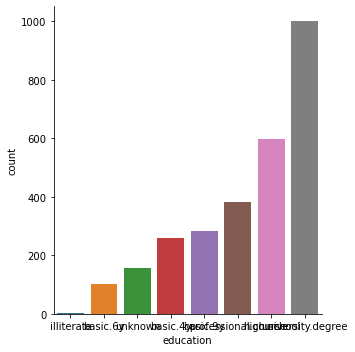

In [34]:
sns.catplot(data= raw_data.loc[(raw_data.y == 'yes') &
              ((raw_data.housing == 'yes') |
              (raw_data.loan == 'yes')), ['education', 'y']], x='education', kind='count', order=['illiterate', 'basic.6y', 'unknown', 'basic.4y', 'basic.9y', 'professional.course', 'high.school', 'university.degree'])

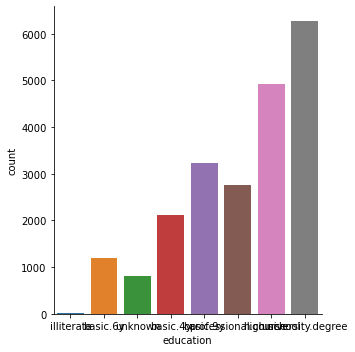

In [35]:
sns.catplot(data= raw_data.loc[(raw_data.y == 'no') &
              ((raw_data.housing == 'yes') |
              (raw_data.loan == 'yes')), ['education', 'y']], 
                x='education', kind='count', order=[
                  'illiterate', 'basic.6y', 'unknown', 'basic.4y', 'basic.9y', 'professional.course', 'high.school', 'university.degree'])

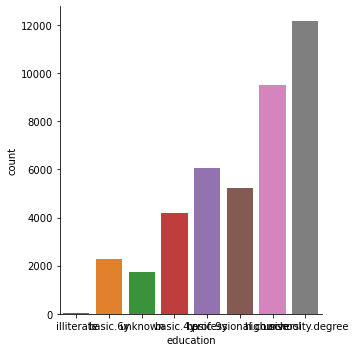

In [36]:
sns.catplot(data= raw_data, 
                x='education', kind='count', order=[
                  'illiterate', 'basic.6y', 'unknown', 'basic.4y', 'basic.9y', 'professional.course', 'high.school', 'university.degree'])

We can see that more than 50% of the records have an educational status of high school and University Degree and including professional course the proportion of the records grows to 65%.

People with an university degree are the most responsive to the campaign with 13% out of the total that has susbribed to the deposit.

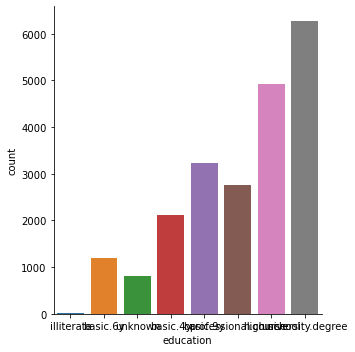

In [37]:
sns.catplot(data= raw_data.loc[(raw_data.y == 'no') &
              ((raw_data.housing == 'yes') |
              (raw_data.loan == 'yes')), ['education', 'y']], 
                x='education', kind='count', order=[
                  'illiterate', 'basic.6y', 'unknown', 'basic.4y', 'basic.9y', 'professional.course', 'high.school', 'university.degree'])

<font size= 3px color=#ffee93>&#x27AD; education_total</font> Counts all the occurrences categorized by education

In [38]:
y_job_education = raw_data[['education','job', 'y']].loc[raw_data.y == 'yes'].groupby(['education', 'job']).count().rename(columns={'y' : 'yes_job_education'})

In [39]:
y_job_education

yes_job_education
education job                            
basic.4y  admin.                       10
          blue-collar                 123
          entrepreneur                  7
          housemaid                    51
          management                    5
...                                   ...
unknown   services                     19
          student                      59
          technician                   25
          unemployed                    5
          unknown                      17

[87 rows x 1 columns]

In [40]:
no_job_education = raw_data[['education','job', 'y']].loc[raw_data.y == 'no'].groupby(['education', 'job']).count().rename(columns={'y' : 'no_job_education'})

In [41]:
no_job_education

no_job_education
education job                           
basic.4y  admin.                      67
          blue-collar               2195
          entrepreneur               130
          housemaid                  423
          management                  95
...                                  ...
unknown   services                   131
          student                    108
          technician                 187
          unemployed                  14
          unknown                    114

[90 rows x 1 columns]

In [42]:
y_job_education = y_job_education.join(no_job_education)

In [43]:
y_job_education

yes_job_education  no_job_education
education job                                              
basic.4y  admin.                       10                67
          blue-collar                 123              2195
          entrepreneur                  7               130
          housemaid                    51               423
          management                    5                95
...                                   ...               ...
unknown   services                     19               131
          student                      59               108
          technician                   25               187
          unemployed                    5                14
          unknown                      17               114

[87 rows x 2 columns]

In [44]:
y_job_education['yes_proportion'] = (y_job_education['yes_job_education'] / (y_job_education['yes_job_education'] + y_job_education['no_job_education']))* 100

In [45]:
y_job_education

yes_job_education  no_job_education  yes_proportion
education job                                                              
basic.4y  admin.                       10                67       12.987013
          blue-collar                 123              2195        5.306299
          entrepreneur                  7               130        5.109489
          housemaid                    51               423       10.759494
          management                    5                95        5.000000
...                                   ...               ...             ...
unknown   services                     19               131       12.666667
          student                      59               108       35.329341
          technician                   25               187       11.792453
          unemployed                    5                14       26.315789
          unknown                      17               114       12.977099

[87 rows x 3 columns]

In [46]:
y_job_education['total_particioated'] = y_job_education['yes_job_education'] + y_job_education['no_job_education']

### <font color=#f68c70>1.1 Job Education Subscribed Distribution</font>

In [47]:
y_job_education.sort_values(['total_particioated'], ascending=[False]).sort_values(['yes_proportion'], ascending=False).head(15)

yes_job_education  no_job_education  \
education           job                                                  
illiterate          retired                        2                 1   
basic.6y            student                        7                 6   
illiterate          entrepreneur                   1                 1   
professional.course student                       17                26   
basic.9y            student                       35                64   
unknown             student                       59               108   
                    retired                       33                65   
illiterate          self-employed                  1                 2   
high.school         student                      114               243   
basic.4y            retired                      185               412   
                    student                        8                18   
unknown             unemployed                     5                14   
university.degree   unknown                       11                34   
professional.course retired                       57               184   
university.degree   retired                       66               219   

                                   yes_proportion  total_particioated  
education           job                                                
illiterate          retired             66.666667                   3  
basic.6y            student             53.846154                  13  
illiterate          entrepreneur        50.000000                   2  
professional.course student             39.534884                  43  
basic.9y            student             35.353535                  99  
unknown             student             35.329341                 167  
                    retired             33.673469                  98  
illiterate          self-employed       33.333333                   3  
high.school         student             31.932773                 357  
basic.4y            retired             30.988275                 597  
                    student             30.769231                  26  
unknown             unemployed          26.315789                  19  
university.degree   unknown             24.444444                  45  
professional.course retired             23.651452                 241  
university.degree   retired             23.157895                 285

## <font color=#52b2cf>Insight</font>

It seems that people with lower education levels tend to subscribe more in proportion to the total of people of the same group that participated in the campaign 

Altouhg this groups don't have the highest rate of participation in the campaing they have the highest positive answer rates

We can observe that people with a lower degree of education and that their work activities are of low complexity, they are retired, they are students or it is not known, they tend to say yes more easily than other groups

People with either `loan` or `housing` tends to subscribe more than those who dont have any kind of credit

In [48]:
raw_data.campaign.max()

56

In [49]:
raw_data.previous.max()

7

In [50]:
raw_data[['campaign', 'pdays', 'previous', 'poutcome', 'y']].loc[raw_data.y == 'yes'].groupby(['poutcome']).count().rename(columns={'y' : 'yes_by_campaign'})

,campaign,pdays,previous,yes_by_campaign
poutcome,,,,
failure,605,605,605,605
nonexistent,3141,3141,3141,3141
success,894,894,894,894


In [51]:
poutcome_previous = raw_data[['previous', 'poutcome', 'y']].loc[raw_data.y == 'yes'].groupby(['poutcome', 'previous']).count().rename(columns={'y' : 'yes_by_campaign'})

### <font color=#f68c70>1.3 Outcome Proportions</font>

In [52]:
poutcome_previous

yes_by_campaign
poutcome    previous                 
failure     1                     451
            2                     112
            3                      32
            4                       9
            5                       1
nonexistent 0                    3141
success     1                     516
            2                     238
            3                      96
            4                      29
            5                      12
            6                       3

Data shows that from previous campaigns in general there were more successful outcomes when less contacts where performed. However this could be because the campaigns are focus on people that haven't been contacted before.

In [53]:
raw_data[other_attributes].loc[raw_data.pdays < 999].loc[raw_data.poutcome != 'nonexistent'].describe()

,campaign,pdays,previous
count,1515.000000,1515.000000,1515.000000
mean,1.822442,6.014521,1.660726
std,1.241414,3.824906,0.934306
min,1.000000,0.000000,1.000000
25%,1.000000,3.000000,1.000000
50%,1.000000,6.000000,1.000000
75%,2.000000,7.000000,2.000000
max,13.000000,27.000000,7.000000


## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #ff9770>Formating</font><br>
<font color=#84dcc6>&#x2730;</font> Outliers<br>
<font color=#84dcc6>&#x2730;</font> Missing Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

About formating we'll perform a change in the `y` column by switching to boolean type and `month` to numeric type

In [54]:
# First lets create a new dataFrame

f_data = raw_data

In [55]:
f_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,NaN,NaN
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN,NaN
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,NaN,NaN
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,NaN,NaN


In [56]:
# Now lets look at the unique values of month

f_data.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [57]:
''' We can see that the unique values are only valid months from March to December'''

f_data.month.replace({
  'mar': 3, 
  'apr': 4, 
  'may': 5, 
  'jun': 6, 
  'jul': 7, 
  'aug': 8, 
  'sep': 9, 
  'oct': 10, 
  'nov': 11, 
  'dec': 12
}).unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

In [58]:
f_data.month.replace({
  'jan': 1, 
  'feb': 2,
  'mar': 3, 
  'apr': 4, 
  'may': 5, 
  'jun': 6, 
  'jul': 7, 
  'aug': 8, 
  'sep': 9, 
  'oct': 10, 
  'nov': 11, 
  'dec': 12
}, inplace=True)

In [59]:
''' Now lets see the data of y'''

f_data.y.unique()

array(['no', 'yes'], dtype=object)

In [60]:
''' We can see that there are only yes and no values'''

f_data.y.replace({
  'yes': True,
  'no': False
}).unique()

array([False,  True])

In [61]:
f_data.y.replace({
  'yes': True, 
  'no': False
}, inplace=True)

In [62]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,5,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN


In [63]:
''' Lets format the days of the week to numbers '''

f_data.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [64]:
f_data.day_of_week.replace({
  'mon': 1,
  'tue': 2, 
  'wed': 3, 
  'thu': 4, 
  'fri': 5
}).unique()

array([1, 2, 3, 4, 5])

In [65]:
f_data.day_of_week.replace({
  'mon': 1,
  'tue': 2, 
  'wed': 3, 
  'thu': 4, 
  'fri': 5
}, inplace=True)

In [66]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN


In [67]:
f_data.pdays.mask((f_data['pdays'] >= 999) & (f_data['previous'] != 0), 14, inplace=True)

In [68]:
f_data.loc[(f_data.pdays == 999) & (f_data.previous != 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22


## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #ff9770>Outliers</font><br>
<font color=#84dcc6>&#x2730;</font> Missing Data<br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

Loocking the `age` variable by it self seems that the there are some extreme left and right values, however taking those values out does not have an impact on the metrics, occurrencies with an `age` greater than `69` are just `1%` of the dataset and they could have meaningful data on the other columns.

Observations with age greater or equal to 70 years old represent only 1.15% of the records

The age average goes from `40.02` to `39.59` if we take out the observations with an `age >= 70`and the median stays at `38`. Therefore we are preserving those observations

### <font color=#f68c70>1.4 Age Distribution</font>

In [69]:
f_data.sort_values(by='age', ascending=False).age.unique()

array([98, 95, 94, 92, 91, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44,
       43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17])

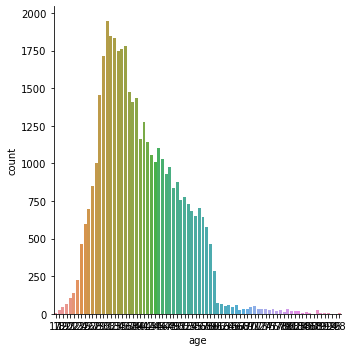

In [70]:
sns.catplot(data=f_data, x='age', kind='count')

In [71]:
print((f_data[f_data.age > 69].age.count() / f_data[f_data.age < 70].age.count())*100)

1.1517964586556644


In [72]:
f_data.age.mean()

40.02406040594348

In [73]:
f_data.loc[f_data.age < 70].age.mean()

39.599007834180604

In [74]:
f_data.age.median()

38.0

In [75]:
f_data.loc[f_data.y < 70].age.median()

38.0

## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Outliers </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color = #ff9770>Missing Data</font><br>
<font color=#84dcc6>&#x2730;</font> Repeated data/indices<br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

In [76]:
''' 
Lets look for unkown values in our client_data columns
'''

unknown_sum = 0

for column in raw_data.loc[:,client_data]:
  unknown_in_column = raw_data[raw_data[column] == 'unknown'][column].count()
  unknown_sum += unknown_in_column
  print('{} -> {} unkown values -> {}%'.format(column, unknown_in_column, round((unknown_in_column/len(raw_data))*100, 2)))

print('\nOf {} rows in the dataset has a total of {} occurrencies of unknown values'\
  .format(len(raw_data), unknown_sum, round(unknown_sum/len(raw_data)*100)))

age -> 0 unkown values -> 0.0%
job -> 330 unkown values -> 0.8%
marital -> 80 unkown values -> 0.19%
education -> 1731 unkown values -> 4.2%
default -> 8597 unkown values -> 20.87%
housing -> 990 unkown values -> 2.4%
loan -> 990 unkown values -> 2.4%

Of 41188 rows in the dataset has a total of 12718 occurrencies of unknown values


### <font color=#f68c70> 1.5 Unknown Values </font>

In [77]:
# For a visual representation of the missing values, lets convert them to Nans

raw_data_na = raw_data.replace('unknown', np.nan)

In [152]:
raw_data_na.drop(labels=['Unnamed: 21','Unnamed: 22'], axis=1, inplace=True)

<AxesSubplot:>

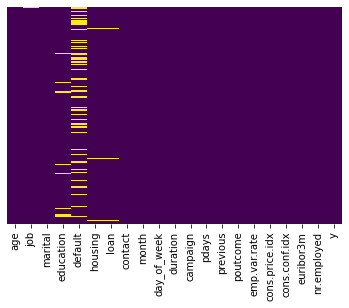

In [153]:
sns.heatmap(raw_data_na.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## <font color=#52b2cf>Insight</font>

the `Default` column has three types of values <font color=#9cadce>[yes, no, unknown]</font> but the hole dataset has only three occurrences of <font color=#9cadce>'yes'</font> this could mean there was an error at capturing the data or that in the first place people with default credit were no subject of these campaigns or that maybe these 3 observations occured before the current campaign, however, the precesence of <font color=#9cadce>8597 'unknown'</font> values could mean tha that information was not available at the time or not collected.

<font color=#61f4de>&#x27AD;</font> At this point it could be more meaningful use the <font color=#9cadce>unknown</font> values as a category value than the 3 obserbations with <font color=#9cadce>yes</font>


In [79]:
f_data[f_data.default == 'yes'].index

Int64Index([21580, 21581, 24866], dtype='int64')

## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Outliers </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color = #70d6ff>Missing Data </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color=#ff9770> Repeated data/indices</font><br>
<font color=#84dcc6>&#x2730;</font> Re-indexing<br>
<font color=#84dcc6>&#x2730;</font> Data Pre-processing<br>

In [80]:
# The easiest way to find duplicates is using the duplicated() method which returns a boolean mask

f_data[f_data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,5,4,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,False,NaN,NaN
12261,36,retired,married,unknown,no,no,no,telephone,7,4,...,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,False,NaN,NaN
14234,27,technician,single,professional.course,no,no,no,cellular,7,1,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False,NaN,NaN
16956,47,technician,divorced,high.school,no,yes,no,cellular,7,4,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,False,NaN,NaN
18465,32,technician,single,professional.course,no,yes,no,cellular,7,4,...,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,False,NaN,NaN
20216,55,services,married,high.school,unknown,no,no,cellular,8,1,...,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,False,NaN,NaN
20534,41,technician,married,professional.course,no,yes,no,cellular,8,2,...,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,False,NaN,NaN
25217,39,admin.,married,university.degree,no,no,no,cellular,11,2,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,False,NaN,NaN
28477,24,services,single,high.school,no,yes,no,cellular,4,2,...,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,False,NaN,NaN
32516,35,admin.,married,university.degree,no,yes,no,cellular,5,5,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,False,NaN,NaN


Considering that the probability that two or more people have the same attributes as; `employment, education, age, and marital status` is high, we only focus on observations in which all variables are equal. under the consideration that it is unlikely that two or more people have the exact attributes and also have registered an identical `duration, pdays and contacts`.

From the above, `12` observations have been eliminated from the data set.

In [81]:
f_data.drop_duplicates(keep='first')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True,NaN,NaN
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False,NaN,NaN
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False,NaN,NaN
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True,NaN,NaN


## Clean Dataset

Lets declare `clean_data` dataset without the dupplicated records, and the 3 observations with default = `yes`

In [82]:
clean_data = f_data

In [83]:
f_data.shape

(41188, 23)

In [84]:
clean_data.drop_duplicates(keep='first', inplace=True)

In [85]:
clean_data.drop(labels=[21580, 21581, 24866], axis=0, inplace=True)

In [86]:
clean_data.shape

(41173, 23)

## <font color=#ff686b>Data Cleaning</font>

<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Formating </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color= #70d6ff>Outliers </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color = #70d6ff>Missing Data </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color=#70d6ff> Repeated data/indices </font>&#x2611;<br>
<font color=#84dcc6>&#x2730;</font> <font color=#ff9770> Data Pre-processing<br>

<font color=#84dcc6>&#x2730;</font> `age_can_class` -> categorical age under the canadian Age Categories, Life Cycle Groupings https://www.statcan.gc.ca/en/concepts/definitions/age2 <br>
<font color=#84dcc6>&#x2730;</font> `contact_var` -> Variation of the number of contacts between campaing 1 and campaign 2<br>
<font color=#84dcc6>&#x2730;</font> `was_contacted` -> categorical identifies if the person was contacted before or not<br>
<font color=#84dcc6>&#x2730;</font> `pweek` -> number of the week when the person was contacted<br>
<font color=#84dcc6>&#x2730;</font> `quarter` -> subclasiffication of the months in quarters<br>
<font color=#84dcc6>&#x2730;</font> `education_lv` -> education category reduction joining Basic and unknown<br>

In [87]:
clean_data.sort_values(by='age', ascending=False).age.unique()

array([98, 95, 94, 92, 91, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44,
       43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27,
       26, 25, 24, 23, 22, 21, 20, 19, 18, 17])

In [88]:
def get_age_canadian_class(x):
  ''' This function receives a cell value and clssifies it according to the canadian
    Age Categories, Life Cycle Groupings
    https://www.statcan.gc.ca/en/concepts/definitions/age2
  '''
  if not type(x) == int or type(x) == float:
    return 'none'
  else:
    if x in range(25, 65):
      return 'adult'
    elif x  in range(15, 25):
      return 'youth'
    elif x >= 65:
      return 'senior'

In [89]:
clean_data.age.apply(get_age_canadian_class).unique()

array(['adult', 'youth', 'senior'], dtype=object)

In [90]:
# Lets create the age_can_class variable

clean_data['age_can_class'] = clean_data.age.apply(get_age_canadian_class)

In [91]:
clean_data.to_csv('clean_data.csv', index=False)

In [92]:
clean_data.age_can_class.unique()

array(['adult', 'youth', 'senior'], dtype=object)

In [93]:
clean_data['contact_var'] = clean_data.campaign - clean_data.previous

In [94]:
f_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1.1,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1


In [95]:
def contacted_before(x):
  ''' This function classifies if the client
    was contacted in previous campaign
  '''
  if x == 999:
    return 0
  if x != 999:
    return 1
  

In [96]:
clean_data.pdays.apply(contacted_before).unique()

array([0, 1])

In [97]:
clean_data['was_contacted'] = clean_data.pdays.apply(contacted_before)

In [98]:
clean_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var,was_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,93.994,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,94.767,-50.8,1.028,4963.6,True,NaN,NaN,senior,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,94.767,-50.8,1.028,4963.6,False,NaN,NaN,adult,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,94.767,-50.8,1.028,4963.6,False,NaN,NaN,adult,2,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,94.767,-50.8,1.028,4963.6,True,NaN,NaN,adult,1,0


In [99]:
clean_data.pdays.unique()

array([999,  14,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,
         2,  12,  13,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [100]:
''' 
  pweeks variable shows the number of week when the person was contacted
'''

def get_week(x) -> int:
  if x == 999:
    return 0
  elif x in range(0, 7):
    return 1
  elif x in range(7, 14):
    return 2
  elif x in range(14, 22):
    return 3
  elif x in range(22, 30):
    return 4

In [101]:
clean_data.pdays.apply(get_week).unique()

array([0, 3, 1, 2, 4])

In [102]:
clean_data['pweek'] = clean_data.pdays.apply(get_week)

In [103]:
clean_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.conf.idx,euribor3m,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var,was_contacted,pweek
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,-36.4,4.857,5191.0,False,NaN,NaN,adult,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,5,...,-50.8,1.028,4963.6,True,NaN,NaN,senior,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,5,...,-50.8,1.028,4963.6,False,NaN,NaN,adult,1,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,11,5,...,-50.8,1.028,4963.6,False,NaN,NaN,adult,2,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,11,5,...,-50.8,1.028,4963.6,True,NaN,NaN,adult,1,0,0


In [104]:
''' Since we have a new variable that identifies the people that has been contacted we can substitute the 999 from pdays to null values'''

clean_data.pdays.replace({
  999: np.nan
}, inplace=True)

In [105]:
clean_data.pdays.unique()

array([nan, 14.,  6.,  4.,  3.,  5.,  1.,  0., 10.,  7.,  8.,  9., 11.,
        2., 12., 13., 15., 16., 21., 17., 18., 22., 25., 26., 19., 27.,
       20.])

In [106]:
clean_data.month.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

In [107]:
def get_quarter(x) -> int:
  if x in range(1, 4):
    return 1
  elif x in range(4, 7):
    return 2
  elif x in range(7, 10):
    return 3
  else:
    return 4

In [108]:
clean_data['quarter'] = clean_data.month.apply(get_quarter)

In [109]:
clean_data.quarter.unique()

array([2, 3, 4, 1])

In [110]:
clean_data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [111]:
def join_basic_education(x) -> str:
  if x in ['basic.4y', 'basic.6y', 'basic.9y', 'unknown']:
    return 'basic'
  else:
    return x

In [112]:
clean_data.education.apply(join_basic_education).unique()

array(['basic', 'high.school', 'professional.course', 'university.degree',
       'illiterate'], dtype=object)

In [113]:
clean_data['education_lvl'] = clean_data.education.apply(join_basic_education)

In [114]:
clean_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'Unnamed: 21',
       'Unnamed: 22', 'age_can_class', 'contact_var', 'was_contacted', 'pweek',
       'quarter', 'education_lvl'],
      dtype='object')

## <font color=#ff686b>Transformed DataFrame</font>

This data set holds the transformed categorical variables to int

<font color=#84dcc6>&#x2730;</font> `job`
| housemaid | services | admin. | blue-collar | technician | retired | management | unemployed | self-employed | entrepreneur | student | unknown |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |

<font color=#84dcc6>&#x2730;</font> `marital`
| married | single | divorsed | unknown |
| --- | --- | --- | --- |
| 0 | 1 | 2 | 3 |

<font color=#84dcc6>&#x2730;</font> `education`
| basic.4y | high.school | basic.6y | basic.9y | professional.course | unknown | university.degree | illiterate | 
| --- | --- | --- | --- | --- | --- | --- | --- | 
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 

<font color=#84dcc6>&#x2730;</font> `default`
| no | unknown | 
| --- | --- | 
| 0 | 1 |

<font color=#84dcc6>&#x2730;</font> `housing`
| no | yes | unknown | 
| --- | --- | --- | 
| 0 | 1 | 2 | 

<font color=#84dcc6>&#x2730;</font> `loan`
| no | yes | unknown |
| --- | --- | --- | 
| 0 | 1 | 2 |

<font color=#84dcc6>&#x2730;</font> `contact`
| telephone | cellular | 
| --- | --- | 
| 0 | 1 | 

<font color=#84dcc6>&#x2730;</font> `poutcome`
| nonexistent | failure | success | 
| --- | --- | --- | 
| 0 | 1 | 2 | 

<font color=#84dcc6>&#x2730;</font> `age_can_class`
| adult | youth | senior | 
| --- | --- | --- | 
|0 | 1 | 2 |

<font color=#84dcc6>&#x2730;</font> `education_lvl`
| basic | high.school | professional.course | university.degree | illiterate | 
| --- | --- | --- | --- | --- | 
| 0 | 1 | 2 | 3 | 4 | 


In [115]:
transformed_df = clean_data

In [116]:
transformed_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var,was_contacted,pweek,quarter,education_lvl
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,basic
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,basic
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school


In [117]:
''' 
Lets prepare the strings for the markdown tables
'''

for column in clean_data.columns:
  if clean_data[column].dtype == 'O':
    unique_values = clean_data[column].unique()
    print(column)
    for u_val in range(len(unique_values)):
      print(unique_values[u_val], end= ' | ')
    print('\n')
    for u_val in range(len(unique_values)):
      print( '---', end= ' | ')
    print('\n')
    for u_val in range(len(unique_values)):
      print(u_val, end= ' | ')
    print('\n')
      


job
housemaid | services | admin. | blue-collar | technician | retired | management | unemployed | self-employed | unknown | entrepreneur | student | 

--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 

marital
married | single | divorced | unknown | 

--- | --- | --- | --- | 

0 | 1 | 2 | 3 | 

education
basic.4y | high.school | basic.6y | basic.9y | professional.course | unknown | university.degree | illiterate | 

--- | --- | --- | --- | --- | --- | --- | --- | 

0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 

default
no | unknown | 

--- | --- | 

0 | 1 | 

housing
no | yes | unknown | 

--- | --- | --- | 

0 | 1 | 2 | 

loan
no | yes | unknown | 

--- | --- | --- | 

0 | 1 | 2 | 

contact
telephone | cellular | 

--- | --- | 

0 | 1 | 

poutcome
nonexistent | failure | success | 

--- | --- | --- | 

0 | 1 | 2 | 

Unnamed: 22
nan | Variacion de numero de contactos entre campania 1 y 2 | dummy sustituir pdays por en numer

In [118]:
''' Our Campaign DataFrame will hold our dummies'''

campaign_df = transformed_df.copy()

In [119]:
campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var,was_contacted,pweek,quarter,education_lvl
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,basic
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,basic
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,5191.0,False,NaN,NaN,adult,1,0,0,2,high.school


In [120]:
''' We drop the pdays columns since it has null values'''

campaign_df.drop(labels='pdays', axis=1, inplace=True)

In [121]:
''' Replace categorical values for integers'''

for column in campaign_df.columns:
  if campaign_df[column].dtype == 'O':
    unique_values = campaign_df[column].unique()
    replace_dict = []
    print(column)
    for u_val in range(len(unique_values)):
      replace_dict.append((unique_values[u_val], u_val))
    print(dict(replace_dict))
    campaign_df[column].replace(dict(replace_dict), inplace=True)
    

job
{'housemaid': 0, 'services': 1, 'admin.': 2, 'blue-collar': 3, 'technician': 4, 'retired': 5, 'management': 6, 'unemployed': 7, 'self-employed': 8, 'unknown': 9, 'entrepreneur': 10, 'student': 11}
marital
{'married': 0, 'single': 1, 'divorced': 2, 'unknown': 3}
education
{'basic.4y': 0, 'high.school': 1, 'basic.6y': 2, 'basic.9y': 3, 'professional.course': 4, 'unknown': 5, 'university.degree': 6, 'illiterate': 7}
default
{'no': 0, 'unknown': 1}
housing
{'no': 0, 'yes': 1, 'unknown': 2}
loan
{'no': 0, 'yes': 1, 'unknown': 2}
contact
{'telephone': 0, 'cellular': 1}
poutcome
{'nonexistent': 0, 'failure': 1, 'success': 2}
Unnamed: 22
{nan: 0, 'Variacion de numero de contactos entre campania 1 y 2': 1, 'dummy sustituir pdays por en numero de la semana categorizado': 2, 'boolean (boolean para pdays)': 3, 'Categorizar meses por trimestre': 4, 'Joint Basics + Unknown': 5}
age_can_class
{'adult': 0, 'youth': 1, 'senior': 2}
education_lvl
{'basic': 0, 'high.school': 1, 'professional.course':

In [122]:
campaign_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,nr.employed,y,Unnamed: 21,Unnamed: 22,age_can_class,contact_var,was_contacted,pweek,quarter,education_lvl
0,56,0,0,0,0,0,0,0,5,1,...,5191.0,False,NaN,0,0,1,0,0,2,0
1,57,1,0,1,1,0,0,0,5,1,...,5191.0,False,NaN,0,0,1,0,0,2,1
2,37,1,0,1,0,1,0,0,5,1,...,5191.0,False,NaN,0,0,1,0,0,2,1
3,40,2,0,2,0,0,0,0,5,1,...,5191.0,False,NaN,0,0,1,0,0,2,0
4,56,1,0,1,0,0,1,0,5,1,...,5191.0,False,NaN,0,0,1,0,0,2,1


In [123]:
campaign_df.y.replace({True: 1, False: 0}, inplace=True)

In [124]:
def get_redundant_pairs(df):
  pairs_to_drop = set()
  cols = df.columns

  for i in range(0, df.shape[1]):
    for j in range(0, i + 1):
      pairs_to_drop.add((cols[i], cols[j]))
  return pairs_to_drop

In [125]:
def get_top_correlations(df, n=10):
  au_corr = df.corr().abs().unstack()
  labels_to_drop = get_redundant_pairs(df)
  au_corr = au_corr.drop(labels= labels_to_drop).sort_values(ascending=False)
  return au_corr[0:n]

In [126]:
get_top_correlations(campaign_df.corr(), transformed_df.shape[0]).to_csv('correlation_pairs.csv')

In [127]:
correlation_pairs = get_top_correlations(transformed_df.corr(), transformed_df.shape[0])

In [128]:
#pd.set_option('display.max_rows', None)

In [129]:
pd.read_excel('data/correlation_pairs.xlsx', sheet_name='Sheet1').head(15)

,x,y,correlation
0,y,was_contacted,0.527426
1,y,age_can_class,0.454501
2,y,contact_var,0.429687
3,y,pweek,0.257814
4,y,education_lvl,0.127876
5,y,quarter,0.042040
6,nr.employed,y,0.724437
7,euribor3m,y,0.680143
8,emp.var.rate,y,0.676076
9,poutcome,y,0.636834


In [130]:
pd.read_excel('data/correlation_pairs.xlsx', sheet_name='Sheet1').iloc[:, 1].unique()

array(['was_contacted', 'age_can_class', 'contact_var', 'pweek',
       'education_lvl', 'quarter', 'y'], dtype=object)

In [131]:
pd.read_excel('data/correlation_pairs.xlsx', sheet_name='Sheet1').iloc[:, 0].unique()

array(['y', 'nr.employed', 'euribor3m', 'emp.var.rate', 'poutcome',
       'duration', 'pdays', 'previous', 'cons.price.idx', 'contact',
       'default', 'campaign', 'job', 'education', 'marital', 'age',
       'month', 'loan', 'housing', 'cons.conf.idx', 'day_of_week'],
      dtype=object)

In [132]:
#pd.set_option('display.max_rows', 10)

In [133]:
''' Drop duration from campaing dataset '''
campaign_df.drop(labels='duration', axis=1, inplace=True)

In [134]:
''' Save the campaign Dataset '''
campaign_df.to_csv('campaing.csv', index=False)

## <font color=#6e78ff>Logistic Regression</font>
### <font color=#68b6ef>All Variables</font>

$$
P(\text{Give}|\text{X}) = \frac{1}{1 + e^{-\left(\beta_{0} + \beta_{1} X_{1} + ... + \beta_{25} X_{25} \right)}}
$$

*where X = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'age_can_class', 'contact_var',
       'was_contacted', 'pweek', 'quarter', 'education_lvl']*

In [135]:
X = campaign_df.copy().drop('y', axis=1)
y = campaign_df.y

In [136]:
''' IMPORTS '''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### Train and Test 

| y | Train | Test | Total |
| --- | --- | --- | --- |
| 0 | 24,499 | 12,035 | 36,534 |
| 1 | 3,086 | 1,553 | 4,639 |
| Total | 27,585 | 13,588 | 41,173 |

In [138]:
y_test.value_counts()

0    12035
1     1553
Name: y, dtype: int64

In [139]:
y_train.value_counts()

0    24499
1     3086
Name: y, dtype: int64

In [140]:
y_test.value_counts().sum() + y_train.value_counts().sum() - transformed_df.shape[0]

0

In [154]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
logmodel.score(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_actual = y_test
y_pred = logmodel.predict(X_test)

results = precision_recall_fscore_support(y_actual, y_pred, average='macro')
accuracy = accuracy_score(y_actual, y_pred)

precision = results[0]
recall = results[1]
fscore = results[2]

print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Accuracy: {}'.format(accuracy))

Precision: 0.808338540088862
Recall: 0.5836463512865325
F-score: 0.6139389215046336
Accuracy: 0.8977774506917868


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12035
           1       0.71      0.18      0.28      1553

    accuracy                           0.90     13588
   macro avg       0.81      0.58      0.61     13588
weighted avg       0.88      0.90      0.87     13588



In [ ]:
confusion_matrix(y_test, y_pred)

array([[11925,   110],
       [ 1279,   274]])

In [ ]:
logmodel.coef_

array([[ 0.00357268,  0.01450925,  0.03286304,  0.0093244 , -0.1485395 ,
        -0.02888677, -0.01867844,  0.34250068, -0.01729544,  0.03836147,
         0.05254394,  0.13354326,  0.44408225, -0.1646549 ,  0.333411  ,
         0.03861172, -0.15479015, -0.00618916,  0.162825  , -0.08099931,
         0.07990817, -0.3981667 ,  0.01693557,  0.05598028]])

In [ ]:
logmodel.coef_[0][0]

0.003572676948218945

In [ ]:
logmodel.intercept_[0]

0.0023945398289763357

| Value | precision | recall | f1-score | support|
| :---: | ---: | ---: | ---: | ---: |
| 0 | 0.90 | 0.99 | 0.94 | 12035 |
| 1 | 0.71 | 0.18 | 0.28 | 1553 |
| accuracy | | | 0.90 | 13588|
| macro avg | 0.88 | 0.58 | 0.61 | 13588 |

$$
P(\text{Give}|\text{attributes}=x ... z) = \frac{1}{1 + e^{-\left(\beta_{0} + \beta_{1}X_{1} + ... + \beta_{n}X_{n}  \right)}}
$$

|  | Predicted: NO | Predicted: YES |
| --- | ---: | ---: |
| Actual NO | TN | FN |
| Actual YES | FP | TP |

<font color=61f4de>&#x27AD;</font> Accuracy:<br>
 &#9; <font color=61f4de>&#x203B;</font> Overall how often is it correct?
$$
\text{Accuracy} = \frac{TP + TN}{total} 
$$
<font color=61f4de>&#x27AD;</font> Misclassification Rate:<br>
 &#9; <font color=61f4de>&#x203B;</font> Overall how often is it wrong?
$$
\text{Misclassification Rate} = \frac{FP + FN}{total}
$$
<font color=61f4de>&#x27AD;</font> Precision:<br>
 &#9; <font color=61f4de>&#x203B;</font> How effective the model is predicting the identifications<br>
$$
\text{Precision} = \frac{TP}{TP + FP}
$$
<font color=61f4de>&#x27AD;</font> Recall:<br>
 &#9; <font color=61f4de>&#x203B;</font> Proportion of the identifications out of `type 1` and `type 2`<br>
$$
\text{Recall} = \frac{TP}{TP + FN}
$$
<font color=61f4de>&#x27AD;</font> F-score:<br>
 &#9; <font color=61f4de>&#x203B;</font> Fscore is the geometric mean of precision and recall that helps to make a balance between both<br>
 &#9; <font color=61f4de>&#x203B;</font> What proportion of the actual number of people that suscribed was identified correctly?
$$
\text{F-score} = 2 * \frac{Precision * Recall}{Precision + Recall} 
$$


## Our Campaign Subset

X = ['poutcome', 'previous', 'was_contacted', 'age_can_class', 'contact_var', 'job', 'education_lvl', 'pweek']

In [ ]:
campaign_subset = campaign_df.loc[:, ['poutcome', 'previous', 'was_contacted', 'age_can_class', 'contact_var', 'job', 'education_lvl', 'pweek', 'y'] + ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [ ]:
X_sub = campaign_subset.copy().drop('y', axis=1)
y_sub = campaign_subset.y

In [ ]:
X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.33, random_state=101)

In [ ]:
X_sub_test.shape

(13588, 13)

In [ ]:
sub_logmodel = LogisticRegression(solver='liblinear')
sub_logmodel.fit(X_sub_train, y_sub_train)
sub_logmodel.score(X_sub_train, y_sub_train)

0.8977705274605764

In [ ]:
y_sub_actual = y_sub_test
y_sub_pred = sub_logmodel.predict(X_sub_test)

print(classification_report(y_sub_actual, y_sub_pred))
print('Confusion Matrix \n{}'.format(
confusion_matrix(y_sub_actual, y_sub_pred)
))


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12035
           1       0.72      0.17      0.28      1553

    accuracy                           0.90     13588
   macro avg       0.81      0.58      0.61     13588
weighted avg       0.88      0.90      0.87     13588

Confusion Matrix 
[[11929   106]
 [ 1283   270]]


In [ ]:
print(classification_report(y_sub_test, y_sub_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12035
           1       0.72      0.17      0.28      1553

    accuracy                           0.90     13588
   macro avg       0.81      0.58      0.61     13588
weighted avg       0.88      0.90      0.87     13588



In [ ]:
confusion_matrix(y_sub_test, y_sub_pred)

array([[11907,   128],
       [ 1269,   284]])

## Decision Tree

In [ ]:
from sklearn import tree

In [ ]:
model_dt = tree.DecisionTreeClassifier(max_depth=11)
model_dt.fit(X_train, y_train)
model_dt.score(X_train, y_train)

0.9252129780677905

In [ ]:
y_tree_actual = y_test
y_tree_pred = model_dt.predict(X_test)

print(classification_report(y_tree_actual, y_tree_pred))
print('Confusion Matrix \n{}'.format(
confusion_matrix(y_tree_actual, y_tree_pred)
))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12035
           1       0.57      0.27      0.36      1553

    accuracy                           0.89     13588
   macro avg       0.74      0.62      0.65     13588
weighted avg       0.87      0.89      0.88     13588

Confusion Matrix 
[[11716   319]
 [ 1138   415]]


In [ ]:
print(classification_report(y_tree_actual, y_tree_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12035
           1       0.57      0.27      0.36      1553

    accuracy                           0.89     13588
   macro avg       0.74      0.62      0.65     13588
weighted avg       0.87      0.89      0.88     13588



In [ ]:
sub_model_tree = tree.DecisionTreeClassifier(max_depth=11)
sub_model_tree.fit(X_sub_train, y_sub_train)
sub_model_tree.score(X_sub_train, y_sub_train)

0.9185064346565163

In [ ]:
y_sub_tree_actual = y_sub_test
y_sub_tree_pred = sub_model_tree.predict(X_sub_test)

print(classification_report(y_sub_tree_actual, y_sub_tree_pred))
print('Confusion Matrix \n{}'.format(
confusion_matrix(y_sub_tree_actual, y_sub_tree_pred)
))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12035
           1       0.53      0.23      0.32      1553

    accuracy                           0.89     13588
   macro avg       0.72      0.60      0.63     13588
weighted avg       0.87      0.89      0.87     13588

Confusion Matrix 
[[11720   315]
 [ 1191   362]]


In [ ]:
from sklearn.metrics import fbeta_score

fbeta_score(y_sub_tree_actual, y_sub_tree_pred, average='binary', beta=0.5)

0.42478291480873037

In [ ]:
(1191+315)/13588

0.11083308801884015

<font color=61f4de>&#x27AD;</font> Accuracy:<br>
 &#9; <font color=61f4de>&#x203B;</font> Overall the model is `89%` correct

<font color=61f4de>&#x27AD;</font> Misclassification Rate:<br>
 &#9; <font color=61f4de>&#x203B;</font> Overall the model is `11%` wrong 
 
<font color=61f4de>&#x27AD;</font> Precision:<br>
 &#9; <font color=61f4de>&#x203B;</font> In average <font color=#f5e960>72%</font> of the model identifications were correct<br>
 &#9; <font color=61f4de>&#x203B;</font> the model has a precision of <font color=#55d6c2>91%</font> predicting a person `not subscribed` to the campaign<br>
 &#9; <font color=61f4de>&#x203B;</font> However the precision of the model identifying the peopple that actually suscribed is `53%`

<font color=61f4de>&#x27AD;</font> Recall:<br>
 &#9; <font color=61f4de>&#x203B;</font> In average <font color=#f5e960>58%</font> of the identifications out of `type 1` and `type 2` errors were correct<br>
 &#9; <font color=61f4de>&#x203B;</font> <font color=#55d6c2>97%</font> of the actual negatives were identified correctly

&#9; <font color=61f4de>&#x203B;</font> the proportion of the actual number of people that suscribed correctly identified was <font color=#ff7477>23%</font>

<font color=61f4de>&#x27AD;</font> F-score:<br>
 &#9; <font color=61f4de>&#x203B;</font> Fscore is the geometric mean of precision and recall that helps to make a balance between both<br>
 &#9; <font color=61f4de>&#x203B;</font> in average the model identifies <font color=#f5e960>63%</font> of the identifications correctly<br>
&#9; <font color=61f4de>&#x203B;</font> However, only <font color=#ff7477>32%</font> of actual subscribed people is identified correctly

<blockquote>
<font color=61f4de>&#x27AD;</font> This may be due to the imbalance between yes and not in the previous campaigns, that the selected variables are highly related to not, but not enough with the yes observations.<br>
From the results, our model could help us predict who would not subscribe to a new campaign, but it would not be effective in predicting those who will subscribe to it.
</blockquote>

In [142]:
campaign_subset_2 = campaign_df.loc[:, ['poutcome', 'previous', 'was_contacted', 'age_can_class', 'contact_var', 'job', 'education_lvl', 'pweek', 'default', 'y'] + ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [143]:
X_sub_2 = campaign_subset_2.copy().drop('y', axis=1)
y_sub_2 = campaign_subset_2.y

In [144]:
X_sub_train_2, X_sub_test_2, y_sub_train_2, y_sub_test_2 = train_test_split(X_sub_2, y_sub_2, test_size=0.33, random_state=101)

In [145]:
X_sub_test_2.shape

(13588, 14)

In [147]:
from sklearn import tree

In [148]:
sub_model_tree_2 = tree.DecisionTreeClassifier(max_depth=11)
sub_model_tree_2.fit(X_sub_train_2, y_sub_train_2)
sub_model_tree_2.score(X_sub_train_2, y_sub_train_2)

0.9175276418343302

In [149]:
y_sub_tree_actual_2 = y_sub_test_2
y_sub_tree_pred_2 = sub_model_tree_2.predict(X_sub_test_2)

print(classification_report(y_sub_tree_actual_2, y_sub_tree_pred_2))
print('Confusion Matrix \n{}'.format(
confusion_matrix(y_sub_tree_actual_2, y_sub_tree_pred_2)
))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12035
           1       0.55      0.26      0.35      1553

    accuracy                           0.89     13588
   macro avg       0.73      0.61      0.65     13588
weighted avg       0.87      0.89      0.87     13588

Confusion Matrix 
[[11709   326]
 [ 1155   398]]
